In [50]:
#pip install geopy

In [49]:
pip install arcgis

  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached keyring-21.7.0-py3-none-any.whl (32 kB)
  Using cached lerc-0.1.0-py3-none-any.whl
  Using cached python_certifi_win32-1.6-py2.py3-none-any.whl (7.2 kB)
  Using cached pyshp-2.1.3-py3-none-any.whl
  Using cached geomet-0.3.0-py3-none-any.whl (28 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached requests_negotiate_sspi-0.5.2-py2.py3-none-any.whl (7.1 kB)
  Using cached requests_kerberos-0.13.0-py2.py3-none-any.whl (11 kB)
  Using cached winkerberos-0.8.0-cp38-cp38-win_amd64.whl (24 kB)
  Using cached setuptools_scm-6.3.2-py3-none-any.whl (33 kB)
  Using cached pyspnego-0.3.1-cp38-cp38-win_amd64.whl (198 kB)
  Using cached pypiwin32-223-py3-none-any.whl (1.7 kB)
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Using cached oauthlib-3.1.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.


In [162]:
import pandas as pd
from pandas import read_csv
import re
import json
import bz2
import os
import geopy
from arcgis.geocoding import reverse_geocode
from arcgis.geometry import Geometry
from arcgis.gis import GIS
from geopy.geocoders import Nominatim

In [7]:
data = pd.read_csv('boston_crime.csv')

C:\Users\clair\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [163]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,854652314,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,NaN,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,NaN,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,NaN,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,NaN,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"


In [183]:
df_filtered = data[['OFFENSE_DESCRIPTION', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'Lat', 'Long', 'Location']]
df_filtered

,OFFENSE_DESCRIPTION,YEAR,MONTH,DAY_OF_WEEK,Lat,Long,Location
0,INVESTIGATE PERSON,2020,2,Thursday,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,INVESTIGATE PERSON,2020,2,Friday,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,FRAUD - CREDIT CARD / ATM FRAUD,2020,4,Friday,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,FRAUD - WELFARE,2020,5,Friday,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,HARASSMENT/ CRIMINAL HARASSMENT,2020,9,Monday,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...
70889,INVESTIGATE PROPERTY,2020,9,Tuesday,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
70890,FRAUD - IMPERSONATION,2020,8,Friday,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
70891,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,7,Thursday,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
70892,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,6,Wednesday,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"


In [10]:
df_filtered['OFFENSE_DESCRIPTION'].value_counts()

INVESTIGATE PERSON                       5122
SICK ASSIST                              4236
M/V - LEAVING SCENE - PROPERTY DAMAGE    3603
VANDALISM                                3323
INVESTIGATE PROPERTY                     3222
                                         ... 
POSSESSION OF BURGLARIOUS TOOLS             4
Evidence Tracker Incidents                  1
LARCENY THEFT FROM COIN-OP MACHINE          1
PROSTITUTION - ASSISTING OR PROMOTING       1
Justifiable Homicide                        1
Name: OFFENSE_DESCRIPTION, Length: 121, dtype: int64

In [83]:
#DOESN'T WORK
# def get_zipcode(df, geolocator):
#     num = df['Location'][1:-1]
#     location = geolocator.reverse(num)
#     return location.raw['address']


# geolocator = geopy.Nominatim(user_agent='cweadock')

In [84]:
#DOESN'T WORK
# test_df = df_filtered.iloc[0:3]
# #test_df['zip']=test_df.apply(get_zipcode, geolocator=geolocator, axis = 1)

# # print(test_df['Location'][0][1:-1])
# # coords = test_df['Location'][0][1:-1]
# location = geolocator.reverse("42.3336792181085, -71.0918775461846")

# print(location.raw['address']['postcode'])

In [85]:
#DOESN"T WORK
#df_filtered['ZIPCODE'] = df_filtered.apply(get_zipcode, geolocator=geolocator, axis=1)

In [ ]:
#read in yelp json
business_df = pd.read_json('yelp_academic_dataset_business.json', lines = True)

In [31]:
#filter json by 'Boston' and cinvert 
boston_businesses = business_df[(business_df.city == 'Boston')]
boston_businesses.to_csv('yelp_boston_businesses')

In [211]:
yelp = pd.read_csv('yelp_boston_businesses')

In [186]:
def get_lat(series):
    pattern = r'(-?\d{2}.\d{3})'
    lat = re.match(pattern, str(series))
    if lat is not None:
        return lat.group(0)
    else:
        return str(series)[0:6]

def get_long(series):
    pattern = r'(-?\d{2}.\d{3})'
    long = re.match(pattern, str(series))
    if long is not None:
        return long.group(0)
    else:
        return str(series)[0:6]

df_filtered['Lat'] = df_filtered['Lat'].map(get_lat)
df_filtered['Long'] = df_filtered['Long'].map(get_long)


C:\Users\clair\AppData\Local\Temp/ipykernel_17364/2411258408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Lat'] = df_filtered['Lat'].map(get_lat)
C:\Users\clair\AppData\Local\Temp/ipykernel_17364/2411258408.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Long'] = df_filtered['Long'].map(get_long)


In [187]:
df_filtered['Long']

0        -71.091
1        -71.091
2        -71.069
3        -71.039
4        -71.059
          ...   
70889    -71.035
70890    -71.124
70891    -71.083
70892    -71.089
70893    -71.047
Name: Long, Length: 70894, dtype: object

In [188]:
def replace_location(df):
    return (df['Lat'], df['Long'])

df_filtered['Location'] = df_filtered.apply(replace_location, axis=1)

C:\Users\clair\AppData\Local\Temp/ipykernel_17364/4167818770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Location'] = df_filtered.apply(replace_location, axis=1)


In [189]:
df_filtered

,OFFENSE_DESCRIPTION,YEAR,MONTH,DAY_OF_WEEK,Lat,Long,Location
0,INVESTIGATE PERSON,2020,2,Thursday,42.333,-71.091,"(42.333, -71.091)"
1,INVESTIGATE PERSON,2020,2,Friday,42.333,-71.091,"(42.333, -71.091)"
2,FRAUD - CREDIT CARD / ATM FRAUD,2020,4,Friday,42.339,-71.069,"(42.339, -71.069)"
3,FRAUD - WELFARE,2020,5,Friday,42.370,-71.039,"(42.370, -71.039)"
4,HARASSMENT/ CRIMINAL HARASSMENT,2020,9,Monday,42.361,-71.059,"(42.361, -71.059)"
...,...,...,...,...,...,...,...
70889,INVESTIGATE PROPERTY,2020,9,Tuesday,42.374,-71.035,"(42.374, -71.035)"
70890,FRAUD - IMPERSONATION,2020,8,Friday,42.256,-71.124,"(42.256, -71.124)"
70891,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,7,Thursday,42.305,-71.083,"(42.305, -71.083)"
70892,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,6,Wednesday,42.323,-71.089,"(42.323, -71.089)"


In [224]:
yelp = yelp.dropna(subset = ['latitude'])
yelp = yelp.dropna(subset = ['longitude'])

In [225]:
#now cleaning yelp dataset using the get_lat and get_long functions
yelp['latitude'] = yelp['latitude'].apply(get_lat)
yelp['longitude'] = yelp['longitude'].apply(get_long)

def replace_location_yelp(yelp):
    return (yelp['latitude'], yelp['longitude'])

yelp['Location'] = yelp.apply(replace_location_yelp, axis=1)

In [226]:
yelp

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Location
0,26,hcRxdDg7DYryCxCoI8ySQA,Longwood Galleria,340-350 Longwood Ave,Boston,MA,2215.0,42.338,-71.106,2.5,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Shopping, Shopping Centers","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'...","(42.338, -71.106)"
1,29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,2128.0,42.363,-71.025,3.5,856,1,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...","(42.363, -71.025)"
2,35,iPD8BBvea6YldQZPHzVrSQ,Espresso Minute,334 Mass Ave,Boston,MA,2115.0,42.342,-71.084,4.5,7,0,"{'NoiseLevel': ""'quiet'"", 'GoodForKids': 'True...","Creperies, Restaurants, Food, Coffee & Tea, Br...","{'Tuesday': '8:0-20:0', 'Wednesday': '8:0-20:0...","(42.342, -71.084)"
3,89,WuoNSCjFBH4OQTSNGc4l6w,Toscana European Day Spa & Salon,231 Newbury St,Boston,MA,2116.0,42.350,-71.081,4.0,138,1,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Beauty & Spas, Hair Salons, Active Life, Day Spas","{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-20...","(42.350, -71.081)"
4,154,zHMsnpMPanzRx-A6AwGSdw,Ecco Beauty Hair Salon,"2 Boylston St, Ste 101",Boston,MA,2116.0,42.352,-71.063,3.5,42,1,"{'BusinessParking': ""{'garage': True, 'street'...","Day Spas, Tanning, Hair Stylists, Massage, Spr...","{'Monday': '10:0-20:0', 'Wednesday': '11:0-18:...","(42.352, -71.063)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,160501,pXj9QQVummN5ANuseK4CvQ,All Star Pizza Bar,204 Cambridge St,Boston,MA,2114.0,42.360,-71.065,4.5,87,0,"{'BikeParking': 'True', 'GoodForMeal': ""{'dess...","Pizza, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","(42.360, -71.065)"
8259,160527,dWIMHmdKbBUeGVqRPMAc9w,JP Oil,525 Centre St,Boston,MA,2130.0,42.317,-71.113,2.5,5,1,NaN,"Gas Stations, Automotive",NaN,"(42.317, -71.113)"
8260,160531,TmrSdCqKqzrv0rhCHnJOsA,MassMoving,NaN,Boston,MA,2445.0,42.332,-71.138,5.0,6,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Movers","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","(42.332, -71.138)"
8261,160532,o7gK1JweWUr9jGwYzF1Olg,Harrison Deli and Pizza,805 Harrison Ave,Boston,MA,2118.0,42.335,-71.074,3.5,8,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Pizza, Delis, Restaurants",NaN,"(42.335, -71.074)"


In [257]:
crimes_by_location = df_filtered.groupby('Location').size().reset_index(name="Crimes In Business Area")
crimes_by_location = pd.DataFrame(crimes_by_location)

In [258]:
crimes_by_location

,Location,Crimes In Business Area
0,"(0.0, 0.0)",1747
1,"(1.3272, 5.2496)",1
2,"(42.232, -71.130)",1
3,"(42.232, -71.131)",2
4,"(42.233, -71.128)",8
...,...,...
6408,"(42.393, -71.010)",3
6409,"(42.393, -71.011)",30
6410,"(42.394, -71.010)",1
6411,"(42.394, -71.067)",12


In [259]:
#merging crimes_by_location and yelp
yelp = yelp[['name', 'address', 'city', 'state', 'latitude', 'longitude', 'stars', 'review_count', 'categories', 'Location']]
merged = yelp.merge(crimes_by_location, how="outer")

In [260]:
merged = merged.dropna()

In [261]:
merged

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes In Business Area
0,Longwood Galleria,340-350 Longwood Ave,Boston,MA,42.338,-71.106,2.5,24.0,"Restaurants, Shopping, Shopping Centers","(42.338, -71.106)",15.0
1,Longwood Barbershop,342 Longwood Ave,Boston,MA,42.338,-71.106,4.0,37.0,"Barbers, Beauty & Spas","(42.338, -71.106)",15.0
2,Sakura,350 Longwood Ave,Boston,MA,42.338,-71.106,3.0,9.0,"Fast Food, Japanese, Restaurants","(42.338, -71.106)",15.0
3,Noodles King,400 Brookline Ave,Boston,MA,42.338,-71.106,4.0,36.0,"Chinese, Food Court, Restaurants, Noodles","(42.338, -71.106)",15.0
4,Dairy Queen,350 Longwood Ave,Boston,MA,42.338,-71.106,3.0,6.0,"Food, Ice Cream & Frozen Yogurt","(42.338, -71.106)",15.0
...,...,...,...,...,...,...,...,...,...,...,...
8254,"The Liberty, a Luxury Collection Hotel, Boston",215 Charles St,Boston,MA,42.361,-71.070,3.5,623.0,"Hotels, Event Planning & Services, Venues & Ev...","(42.361, -71.070)",17.0
8255,Scampo,215 Charles St,Boston,MA,42.361,-71.070,4.0,569.0,"Wine Bars, Bars, Restaurants, Nightlife, Break...","(42.361, -71.070)",17.0
8256,It's A Wrap,100 Morrissey Blvd,Boston,MA,42.315,-71.048,3.0,6.0,"Sandwiches, Restaurants","(42.315, -71.048)",1.0
8257,The Braces Place,1792 Dorchester Ave,Boston,MA,42.289,-71.063,1.5,17.0,"Dentists, Health & Medical, Pediatric Dentists...","(42.289, -71.063)",14.0


In [341]:
#location_grouped = pd.DataFrame(merged.groupby('Location').size().reset_index(name="Crimes In Business Area").agg({'stars':'mean'}))
location_grouped = pd.DataFrame(merged.groupby('Location').agg({'stars':'mean', 'Crimes In Business Area': 'mean'}))
location_grouped=location_grouped.reset_index()

In [342]:
def get_lat2(row):
    coord_pair_lst = row['Location'].split(',')
    return float(coord_pair_lst[0][2:8])

def get_long2(row):
    coord_pair_lst = row['Location'].split(',')
    return float(coord_pair_lst[1][2:9])

location_grouped['lat'] = location_grouped.apply(get_lat2, axis=1)
location_grouped['long'] = location_grouped.apply(get_long2, axis=1)
location_grouped

,Location,stars,Crimes In Business Area,lat,long
0,"('42.239', '-71.138')",5.00,3.0,42.239,-71.138
1,"('42.244', '-71.132')",4.50,7.0,42.244,-71.132
2,"('42.248', '-71.131')",4.50,4.0,42.248,-71.131
3,"('42.251', '-71.128')",5.00,8.0,42.251,-71.128
4,"('42.251', '-71.130')",4.25,7.0,42.251,-71.130
...,...,...,...,...,...
1326,"('42.390', '-71.005')",5.00,9.0,42.390,-71.005
1327,"('42.391', '-71.012')",2.50,1.0,42.391,-71.012
1328,"('42.391', '-71.013')",3.50,6.0,42.391,-71.013
1329,"('42.393', '-71.010')",1.50,3.0,42.393,-71.010


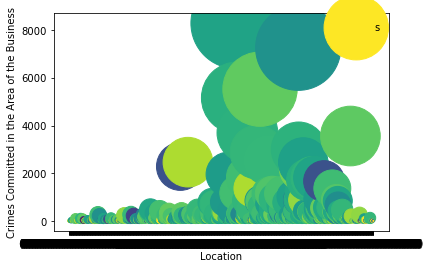

In [316]:
import matplotlib.pyplot as plt
from matplotlib import cm
#viz 1: bubble plot with number of crimes being the size of the bubble, each bubble is a location, color corresponds to
# the number of stars a business has
#X = location, Y= number of crimes
merged['Location'] = merged['Location'].map(lambda x: str(x))

plt.scatter('Location', 'Crimes In Business Area', s = 'Crimes In Business Area', data = location_grouped, c='stars')
plt.xlabel('Location')
plt.ylabel('Crimes Committed in the Area of the Business')

#plt.legend('stars')

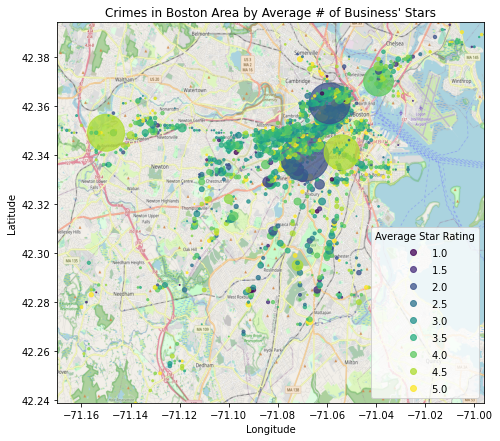

In [363]:
#hopefully map visualizations
BBox = (location_grouped.long.min(), location_grouped.long.max(), location_grouped.lat.min(), location_grouped.lat.max())

map_png = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (8,7))
scatter = ax.scatter(location_grouped.long, location_grouped.lat, zorder=1, alpha = 0.75, c=location_grouped['stars'], s=location_grouped['Crimes In Business Area'])

ax.set_title("Crimes in Boston Area by Average # of Business' Stars")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(map_png, zorder=0, extent = BBox, aspect= 'equal')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Average Star Rating")